# Data Preparation

     Exchange Date  Close   Net  %Chg   Open    Low   High     Volume  \
2795    2013-01-02  19.61   NaN   NaN  19.78  19.34  19.82  560500025   
2794    2013-01-03  19.36 -0.25   NaN  19.57  19.32  19.63  352964153   
2793    2013-01-04  18.82 -0.54   NaN  19.18  18.78  19.24  594328034   
2792    2013-01-07  18.71 -0.11   NaN  18.64  18.40  18.90  484153188   
2791    2013-01-08  18.76  0.05   NaN  18.90  18.62  19.00  458707463   

      Turnover - USD  Flow  
2795             NaN   0.0  
2794             NaN   0.0  
2793             NaN   0.0  
2792             NaN   0.0  
2791             NaN   0.0  


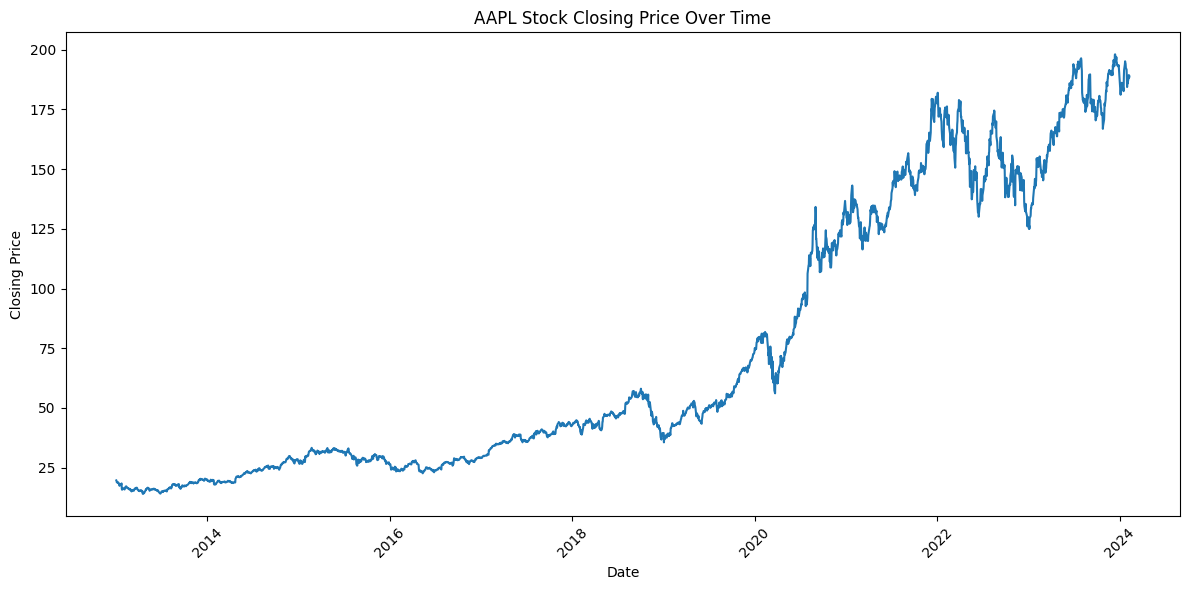

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def load_stock_data(file_path):
    # load the stock data
    df = pd.read_csv(file_path)
    
    # convert exchange date to datetime
    df['Exchange Date'] = pd.to_datetime(df['Exchange Date'], format='%Y-%m-%d')
    
    # convert numeric columns to appropriate types
    numeric_columns = ['Close', 'Net', '%Chg', 'Open', 'Low', 'High', 'Volume', 'Turnover - USD', 'Flow']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col].replace(',', '', regex=True), errors='coerce')
    df = df.sort_values('Exchange Date')
    return df

# analyze apple stocks
file_path = '/Users/sebastian_a/Downloads/sentimental_analysis_files/stocks/AAPL_2024-02-10.csv'
stock_data = load_stock_data(file_path)
print(stock_data.head())
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Exchange Date'], stock_data['Close'])
plt.title('AAPL Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

     Exchange Date  Close   Net  %Chg   Open    Low   High   Volume  \
2795    2013-01-02  74.02   NaN   NaN  77.73  73.35  77.96  3115024   
2794    2013-01-03  75.09  1.07   NaN  73.59  73.36  76.05  1801801   
2793    2013-01-04  71.95 -3.14   NaN  72.35  70.27  72.55  6143255   
2792    2013-01-07  71.10 -0.85   NaN  71.19  70.10  72.02  2564309   
2791    2013-01-08  71.63  0.53   NaN  71.27  70.36  71.67  2226024   

      Turnover - USD  Flow  
2795             NaN   0.0  
2794             NaN   0.0  
2793             NaN   0.0  
2792             NaN   0.0  
2791             NaN   0.0  


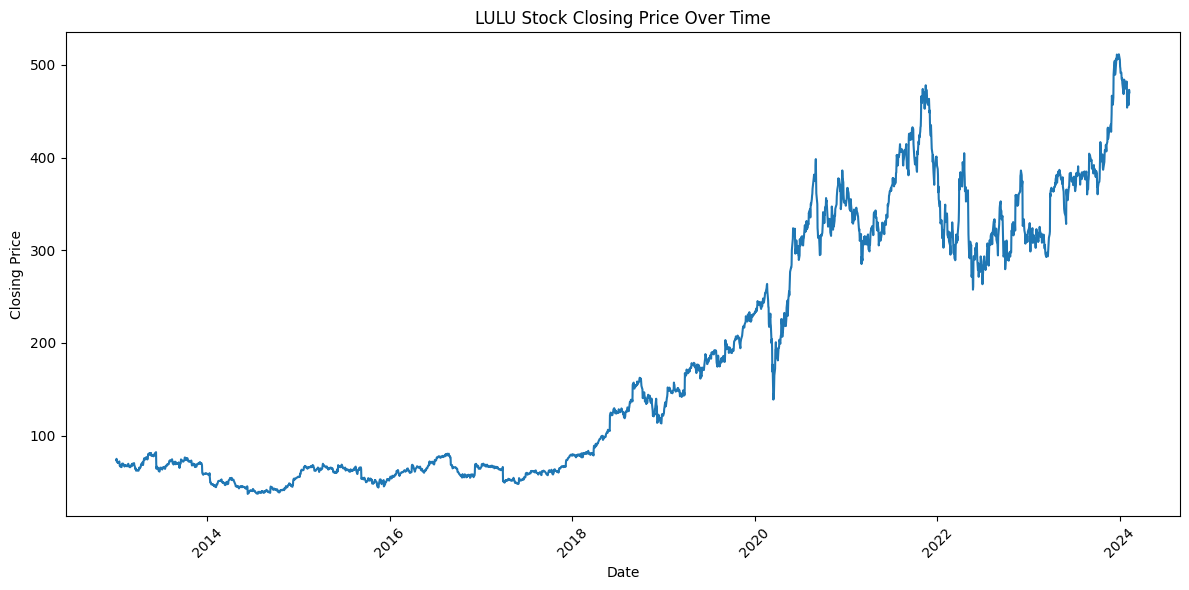

In [2]:
# analyze Lululemon stocks using the above function
file_path = '/Users/sebastian_a/Downloads/sentimental_analysis_files/stocks/LULU_2024-02-10.csv'
stock_data = load_stock_data(file_path)
print(stock_data.head())
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Exchange Date'], stock_data['Close'])
plt.title('LULU Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

         Date    Per     Per End  Reported  Estimate  %Surp  Beat Pred
47 2013-04-23  Q2 13  1900-03-13     0.360     0.357    NaN       True
46 2013-07-23  Q3 13  1900-06-13     0.267     0.262    NaN       True
45 2013-10-28  Q4 13  1900-09-13     0.295     0.283    NaN       True
44 2014-01-27  Q1 14  1900-12-13     0.517     0.502    NaN       True
43 2014-04-23  Q2 14  1900-03-14     0.413     0.364    NaN       True


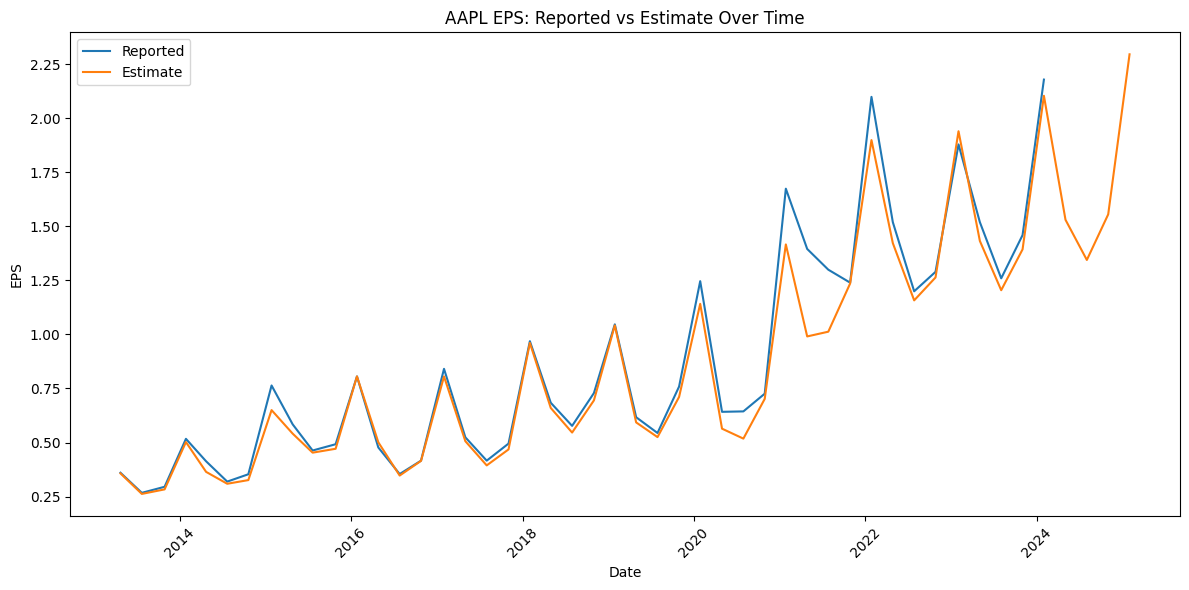

In [3]:
def load_eps_data(file_path):
    # load the EPS data and convert data to datetime
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    
    # convert numeric columns to appropriate types
    numeric_columns = ['Reported', 'Estimate', '%Surp']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # convert beat pred to boolean and sort by date
    df['Beat Pred'] = df['Beat Pred'].astype(bool)
    df = df.sort_values('Date')
    
    return df

# analyze Apple EPS data with function
file_path = '/Users/sebastian_a/Downloads/sentimental_analysis_files/earnings/AAPL_EPS.csv'
eps_data = load_eps_data(file_path)
print(eps_data.head())
plt.figure(figsize=(12, 6))
plt.plot(eps_data['Date'], eps_data['Reported'], label='Reported')
plt.plot(eps_data['Date'], eps_data['Estimate'], label='Estimate')
plt.title('AAPL EPS: Reported vs Estimate Over Time')
plt.xlabel('Date')
plt.ylabel('EPS')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

         Date    Per     Per End  Reported  Estimate  %Surp  Beat Pred
47 2013-03-21  Q4 13  1900-02-13      0.75     0.740    NaN       True
46 2013-06-10  Q1 14  1900-05-13      0.32     0.302    NaN       True
45 2013-09-12  Q2 14  1900-08-13      0.39     0.350    NaN       True
44 2013-12-12  Q3 14  1900-11-13      0.45     0.409    NaN       True
43 2014-03-27  Q4 14  1900-02-14      0.75     0.719    NaN       True


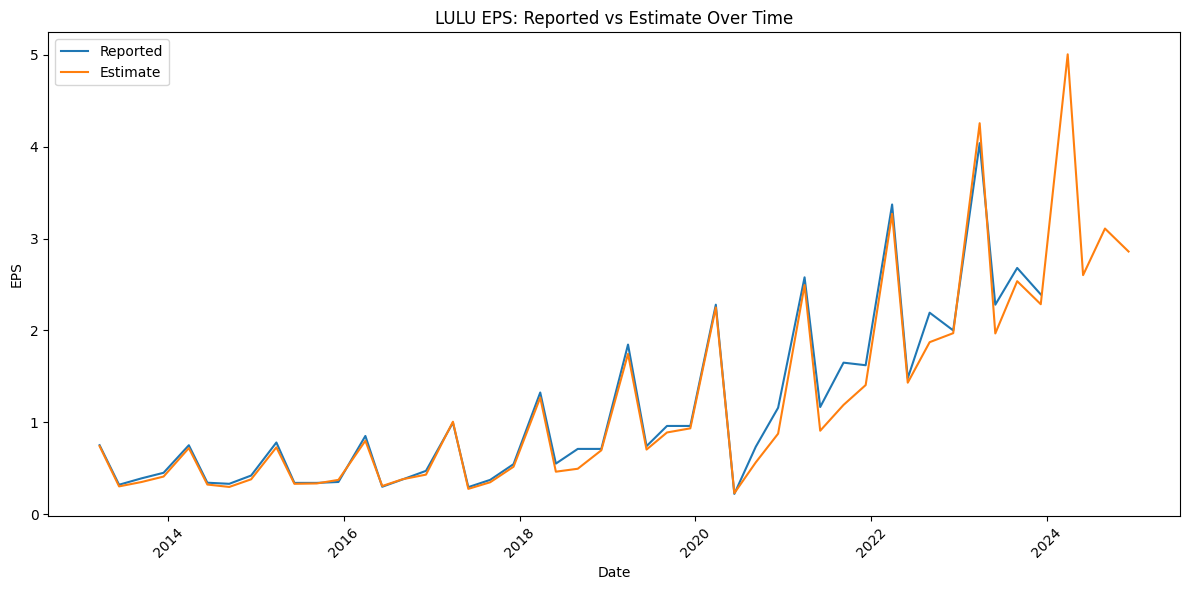

In [4]:
# analyze LULU EPS data using function above
file_path = '/Users/sebastian_a/Downloads/sentimental_analysis_files/earnings/LULU_EPS.csv'
eps_data = load_eps_data(file_path)

print(eps_data.head())
plt.figure(figsize=(12, 6))
plt.plot(eps_data['Date'], eps_data['Reported'], label='Reported')
plt.plot(eps_data['Date'], eps_data['Estimate'], label='Estimate')
plt.title('LULU EPS: Reported vs Estimate Over Time')
plt.xlabel('Date')
plt.ylabel('EPS')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

         Date    Per     Per End  Reported  Estimate  %Surp  Beat Pred
47 2013-04-23  Q2 13  1900-03-13    43.603    42.252    NaN       True
46 2013-07-23  Q3 13  1900-06-13    35.323    35.064    NaN       True
45 2013-10-28  Q4 13  1900-09-13    37.472    36.849    NaN       True
44 2014-01-27  Q1 14  1900-12-13    57.594    57.470    NaN       True
43 2014-04-23  Q2 14  1900-03-14    45.646    43.550    NaN       True


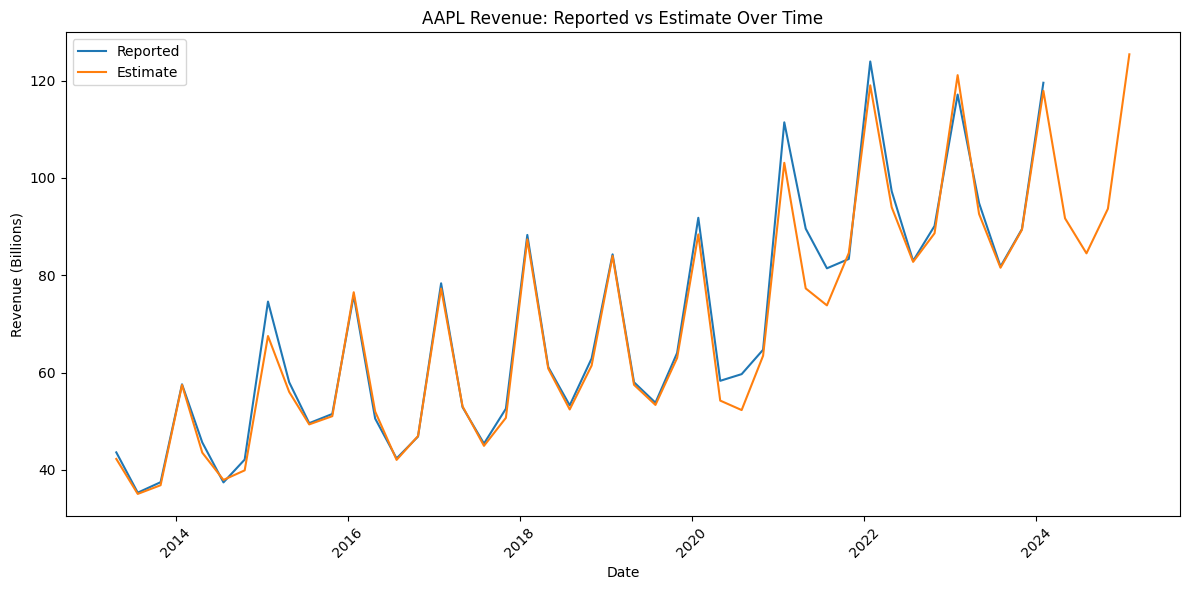

In [5]:
def load_revenue_data(file_path):
    df = pd.read_csv(file_path)
    
    # convert date to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    
    # convert numeric columns to appropriate types
    numeric_columns = ['Reported', 'Estimate', '%Surp']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col].str.replace('B', ''), errors='coerce')
    
    # convert beat pred to boolean and sort by date
    df['Beat Pred'] = df['Beat Pred'].astype(bool)
    df = df.sort_values('Date')
    
    return df

# use function to load apple revenue data
file_path = '/Users/sebastian_a/Downloads/sentimental_analysis_files/earnings/AAPL_REV.csv'
revenue_data = load_revenue_data(file_path)

print(revenue_data.head())

plt.figure(figsize=(12, 6))
plt.plot(revenue_data['Date'], revenue_data['Reported'], label='Reported')
plt.plot(revenue_data['Date'], revenue_data['Estimate'], label='Estimate')
plt.title('AAPL Revenue: Reported vs Estimate Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (Billions)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

         Date    Per     Per End  Reported  Estimate  %Surp  Beat Pred
47 2013-03-21  Q4 13  1900-02-13       NaN       NaN    NaN       True
46 2013-06-10  Q1 14  1900-05-13       NaN       NaN    NaN       True
45 2013-09-12  Q2 14  1900-08-13       NaN       NaN    NaN       True
44 2013-12-12  Q3 14  1900-11-13       NaN       NaN    NaN       True
43 2014-03-27  Q4 14  1900-02-14       NaN       NaN    NaN       True


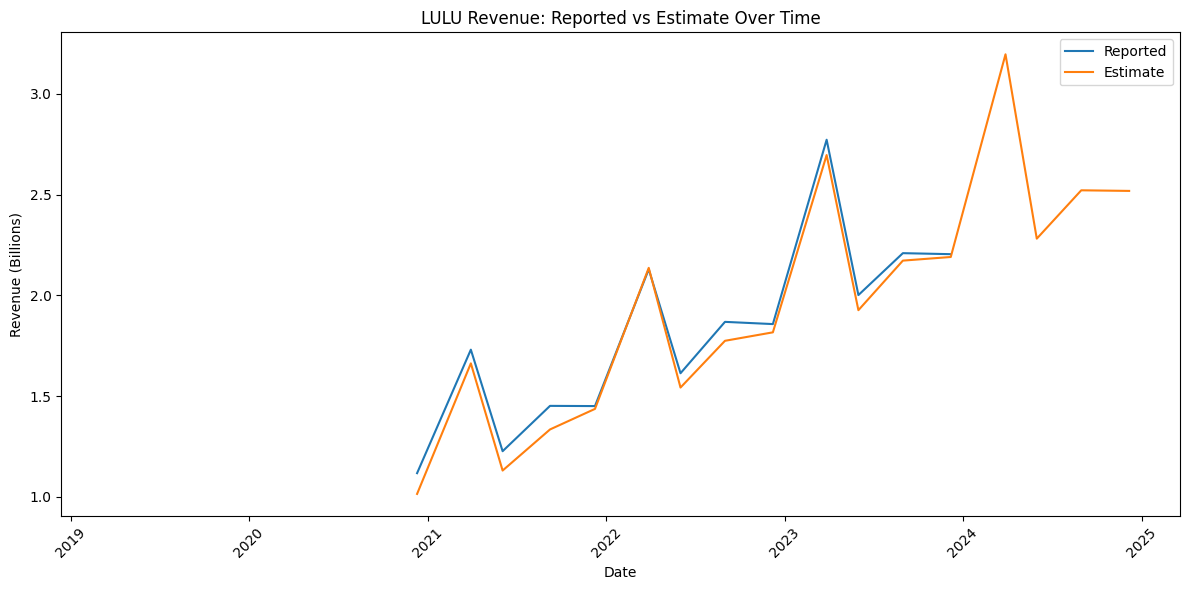

In [6]:
# use function to load lulu revenue data
file_path = '/Users/sebastian_a/Downloads/sentimental_analysis_files/earnings/LULU_REV.csv'
revenue_data = load_revenue_data(file_path)

print(revenue_data.head())

plt.figure(figsize=(12, 6))
plt.plot(revenue_data['Date'], revenue_data['Reported'], label='Reported')
plt.plot(revenue_data['Date'], revenue_data['Estimate'], label='Estimate')
plt.title('LULU Revenue: Reported vs Estimate Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (Billions)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sentiment Analysis

In [7]:
import os
import re
from datetime import datetime

# parse/preprocess the sales transcripts
def parse_date(date_str):
    formats = ['%Y%m%d', '%Y%m', '%Y']
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"Unable to parse date from: {date_str}")

def load_transcripts(directory, company):
    transcripts = {}
    date_pattern = r'(\d{4,8})'  # pattern to match 4 to 8 digits for the date
    
    for filename in os.listdir(directory):
        if filename.startswith(company) and filename.endswith('.txt'):
            file_path = os.path.join(directory, filename)
            
            # extract date from filename
            match = re.search(date_pattern, filename)
            if match:
                date_str = match.group(1)
                try:
                    date = parse_date(date_str)
                    
                    # read the content of the file
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                    
                    transcripts[date] = content
                except ValueError as e:
                    print(f"Skipping file {filename}: {str(e)}")
    
    return transcripts

# use function to load a sample transcript
directory = '/Users/sebastian_a/Downloads/sentimental_analysis_files/transcripts/txt'

# process Apple transcripts
apple_transcripts = load_transcripts(directory, 'Apple Inc')

# process Lululemon transcripts
lululemon_transcripts = load_transcripts(directory, 'Lululemon Athletica Inc')

# print some information about the loaded transcripts
print(f"Number of Apple transcripts: {len(apple_transcripts)}")
print(f"Number of Lululemon transcripts: {len(lululemon_transcripts)}")

# print the dates of the transcripts
print("\nApple transcript dates:")
for date in sorted(apple_transcripts.keys()):
    print(date.strftime('%Y-%m-%d'))

print("\nLululemon transcript dates:")
for date in sorted(lululemon_transcripts.keys()):
    print(date.strftime('%Y-%m-%d'))

# print a sample of the first Apple transcript
if apple_transcripts:
    first_apple_date = min(apple_transcripts.keys())
    print(f"\nSample of Apple transcript from {first_apple_date.strftime('%Y-%m-%d')}:")
    print(apple_transcripts[first_apple_date][:500])  # print first 500 characters
else:
    print("\nNo Apple transcripts found.")

Number of Apple transcripts: 27
Number of Lululemon transcripts: 21

Apple transcript dates:
2013-02-12
2015-02-10
2015-06-19
2015-08-07
2015-09-29
2016-10-06
2017-02-16
2017-04-12
2018-09-12
2018-10-30
2019-03-25
2019-07-09
2019-09-10
2020-03-17
2020-05-27
2020-06-22
2020-09-15
2020-10-13
2020-11-10
2021-04-20
2021-09-14
2021-10-18
2022-03-08
2022-09-07
2023-06-05
2023-09-12
2023-10-31

Lululemon transcript dates:
2013-11-06
2013-12-10
2014-11-04
2015-06-11
2015-06-23
2015-09-17
2015-11-02
2016-06-22
2016-08-15
2016-11-02
2016-12-07
2017-01-10
2017-06-14
2018-06-06
2018-06-13
2018-10-08
2019-04-24
2020-06-29
2022-04-20
2022-06-08
2023-09-12

Sample of Apple transcript from 2013-02-12:
FINAL TRANSCRIPT 2013-02-12
Apple Inc (AAPL US Equity)
Page 1 of 17, Analyst
, Chairman, CEO
, CEO
Unidentiﬁed Speaker, Analyst
Unidentiﬁed Speaker
Lloyd BlankfeinGoldman Sachs Technology & Internet Conference
Company Participants
Bill Shope
Lloyd Blankfein
Tim Cook
Presentation
It's my pleasure to kick 

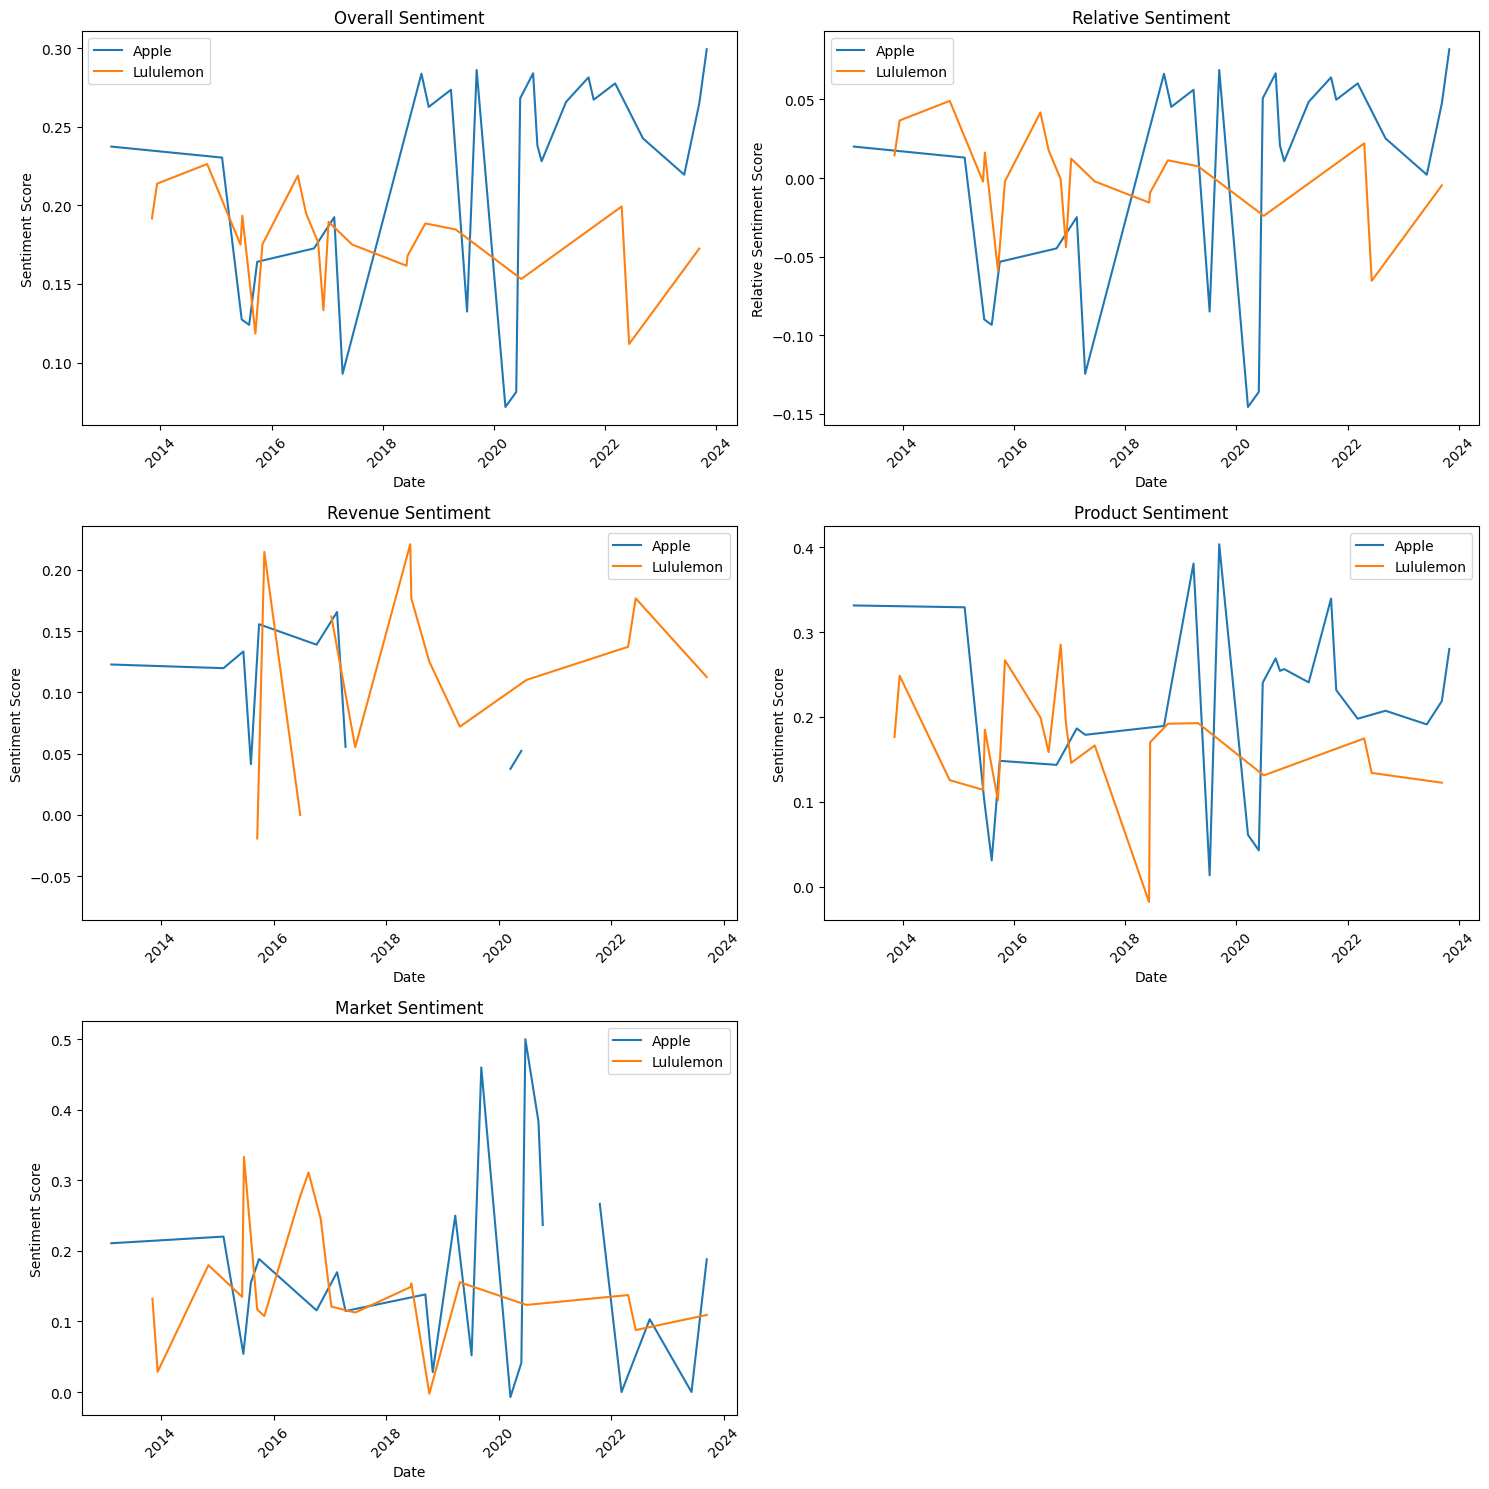

Apple Sentiment Summary:
                      date  overall_sentiment  revenue_sentiment  \
count                   27          27.000000          11.000000   
mean   2019-06-28 11:33:20           0.217378           0.093288   
min    2013-02-12 00:00:00           0.071707           0.003571   
25%    2017-03-15 12:00:00           0.168354           0.046860   
50%    2020-03-17 00:00:00           0.238040           0.119722   
75%    2021-07-02 12:00:00           0.270828           0.136111   
max    2023-10-31 00:00:00           0.299328           0.165536   
std                    NaN           0.070545           0.055939   

       product_sentiment  market_sentiment  relative_sentiment  
count          27.000000         23.000000        2.700000e+01  
mean            0.211368          0.168276       -2.775558e-17  
min             0.013674         -0.007030       -1.456712e-01  
25%             0.163726          0.053098       -4.902478e-02  
50%             0.218785          0.1

In [8]:
from textblob import TextBlob # use textblob
import numpy as np

def chunk_text(text, chunk_size=1000):
    words = text.split()
    return [' '.join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]

def analyze_sentiment(text):
    chunks = chunk_text(text)
    sentiments = [TextBlob(chunk).sentiment.polarity for chunk in chunks]
    return np.mean(sentiments)

def analyze_aspect_sentiment(text, aspect):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    aspect_sentences = [sent for sent in sentences if aspect.lower() in sent.lower()]
    if aspect_sentences:
        return np.mean([TextBlob(sent).sentiment.polarity for sent in aspect_sentences])
    return np.nan

def analyze_transcripts(transcripts):
    results = []
    for date, text in transcripts.items():
        overall_sentiment = analyze_sentiment(text)
        revenue_sentiment = analyze_aspect_sentiment(text, 'revenue')
        product_sentiment = analyze_aspect_sentiment(text, 'product')
        market_sentiment = analyze_aspect_sentiment(text, 'market')
        results.append({
            'date': date,
            'overall_sentiment': overall_sentiment,
            'revenue_sentiment': revenue_sentiment,
            'product_sentiment': product_sentiment,
            'market_sentiment': market_sentiment
        })
    df = pd.DataFrame(results).sort_values('date')
    df['relative_sentiment'] = df['overall_sentiment'] - df['overall_sentiment'].mean()
    return df

# analyze Apple transcripts
apple_sentiment = analyze_transcripts(apple_transcripts)

# analyze Lululemon transcripts
lululemon_sentiment = analyze_transcripts(lululemon_transcripts)

# plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# overall Sentiment
axs[0, 0].plot(apple_sentiment['date'], apple_sentiment['overall_sentiment'], label='Apple')
axs[0, 0].plot(lululemon_sentiment['date'], lululemon_sentiment['overall_sentiment'], label='Lululemon')
axs[0, 0].set_title('Overall Sentiment')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Sentiment Score')
axs[0, 0].legend()
axs[0, 0].tick_params(axis='x', rotation=45)

# relative Sentiment
axs[0, 1].plot(apple_sentiment['date'], apple_sentiment['relative_sentiment'], label='Apple')
axs[0, 1].plot(lululemon_sentiment['date'], lululemon_sentiment['relative_sentiment'], label='Lululemon')
axs[0, 1].set_title('Relative Sentiment')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Relative Sentiment Score')
axs[0, 1].legend()
axs[0, 1].tick_params(axis='x', rotation=45)

# revenue Sentiment
axs[1, 0].plot(apple_sentiment['date'], apple_sentiment['revenue_sentiment'], label='Apple')
axs[1, 0].plot(lululemon_sentiment['date'], lululemon_sentiment['revenue_sentiment'], label='Lululemon')
axs[1, 0].set_title('Revenue Sentiment')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Sentiment Score')
axs[1, 0].legend()
axs[1, 0].tick_params(axis='x', rotation=45)

# product Sentiment
axs[1, 1].plot(apple_sentiment['date'], apple_sentiment['product_sentiment'], label='Apple')
axs[1, 1].plot(lululemon_sentiment['date'], lululemon_sentiment['product_sentiment'], label='Lululemon')
axs[1, 1].set_title('Product Sentiment')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Sentiment Score')
axs[1, 1].legend()
axs[1, 1].tick_params(axis='x', rotation=45)

# market Sentiment
axs[2, 0].plot(apple_sentiment['date'], apple_sentiment['market_sentiment'], label='Apple')
axs[2, 0].plot(lululemon_sentiment['date'], lululemon_sentiment['market_sentiment'], label='Lululemon')
axs[2, 0].set_title('Market Sentiment')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Sentiment Score')
axs[2, 0].legend()
axs[2, 0].tick_params(axis='x', rotation=45)

# remove the unused subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

# summary statistics
print("Apple Sentiment Summary:")
print(apple_sentiment.describe())
print("\nLululemon Sentiment Summary:")
print(lululemon_sentiment.describe())

# most positive and negative calls for each company
print("\nApple Most Positive Call:")
print(apple_sentiment.loc[apple_sentiment['overall_sentiment'].idxmax()])
print("\nApple Most Negative Call:")
print(apple_sentiment.loc[apple_sentiment['overall_sentiment'].idxmin()])
print("\nLululemon Most Positive Call:")
print(lululemon_sentiment.loc[lululemon_sentiment['overall_sentiment'].idxmax()])
print("\nLululemon Most Negative Call:")
print(lululemon_sentiment.loc[lululemon_sentiment['overall_sentiment'].idxmin()])

# Correlation Analysis w/ Text Embeddings


Apple Analysis:


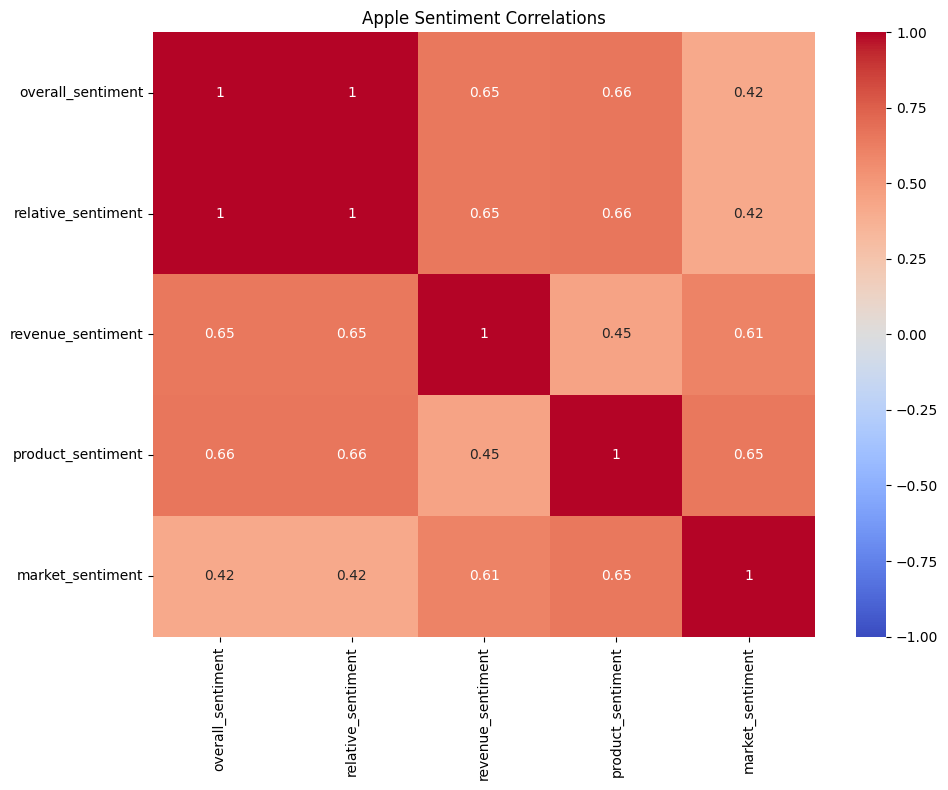

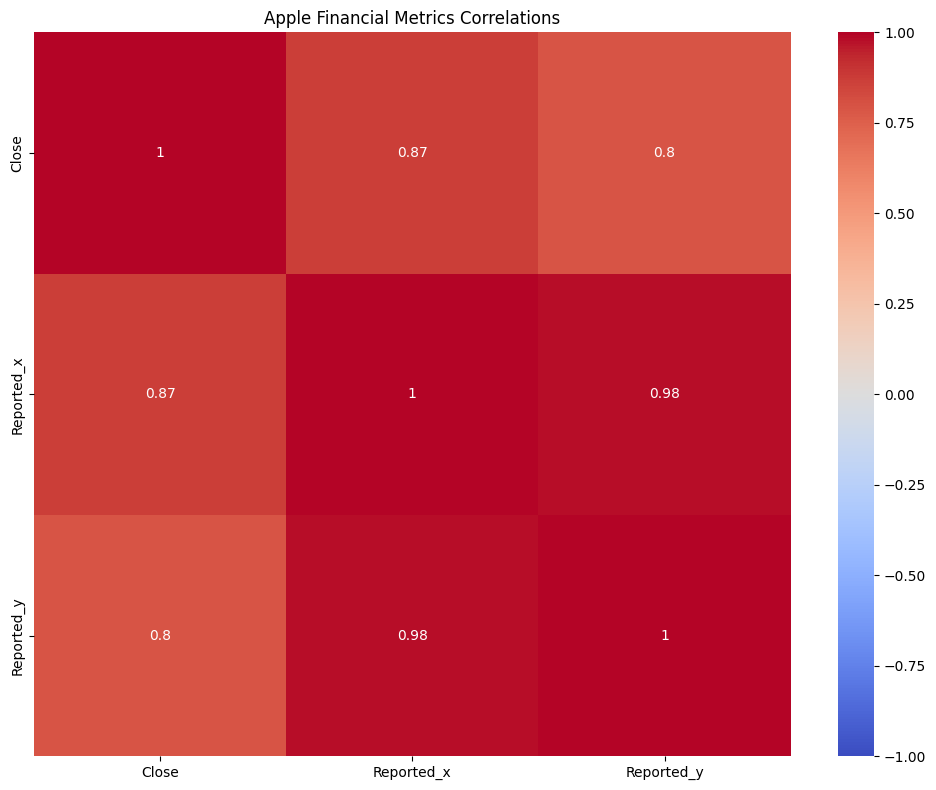

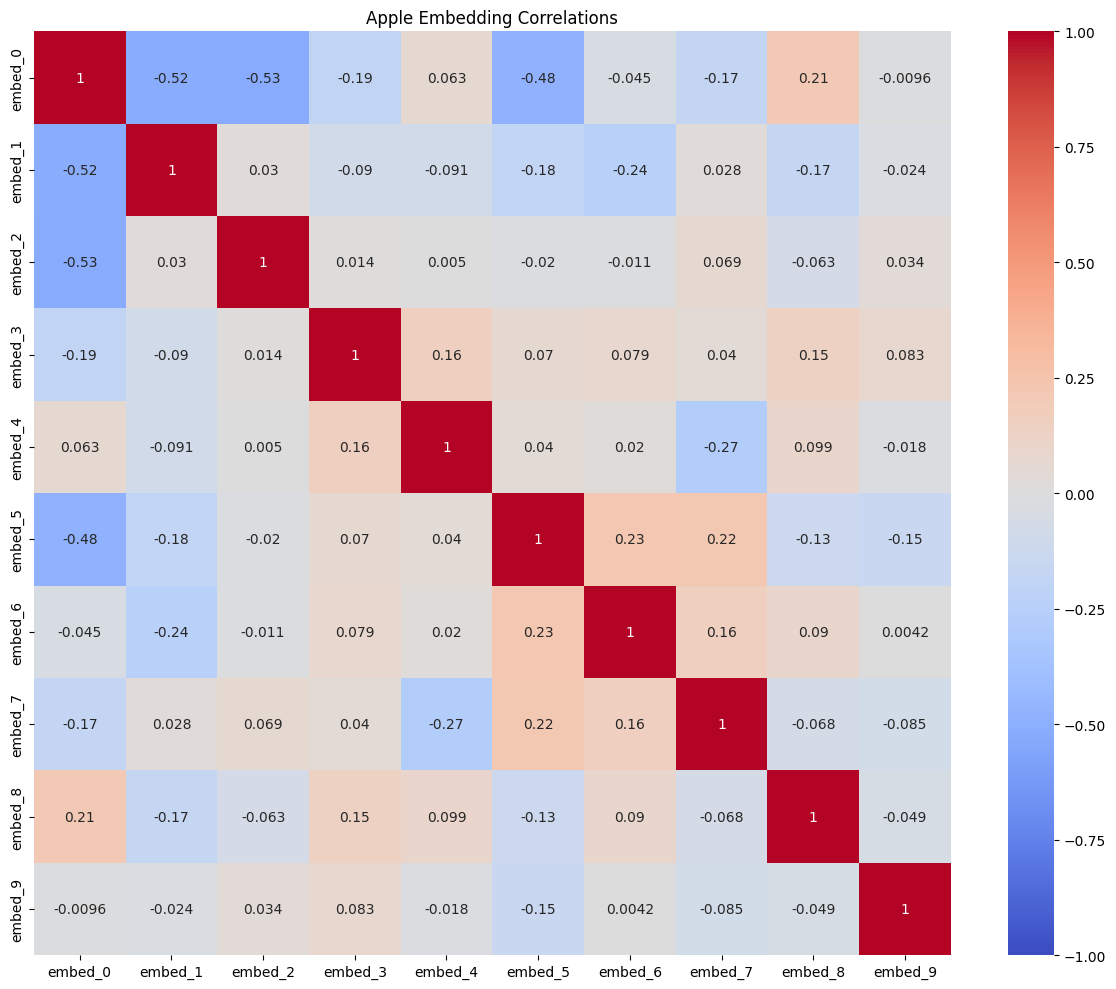

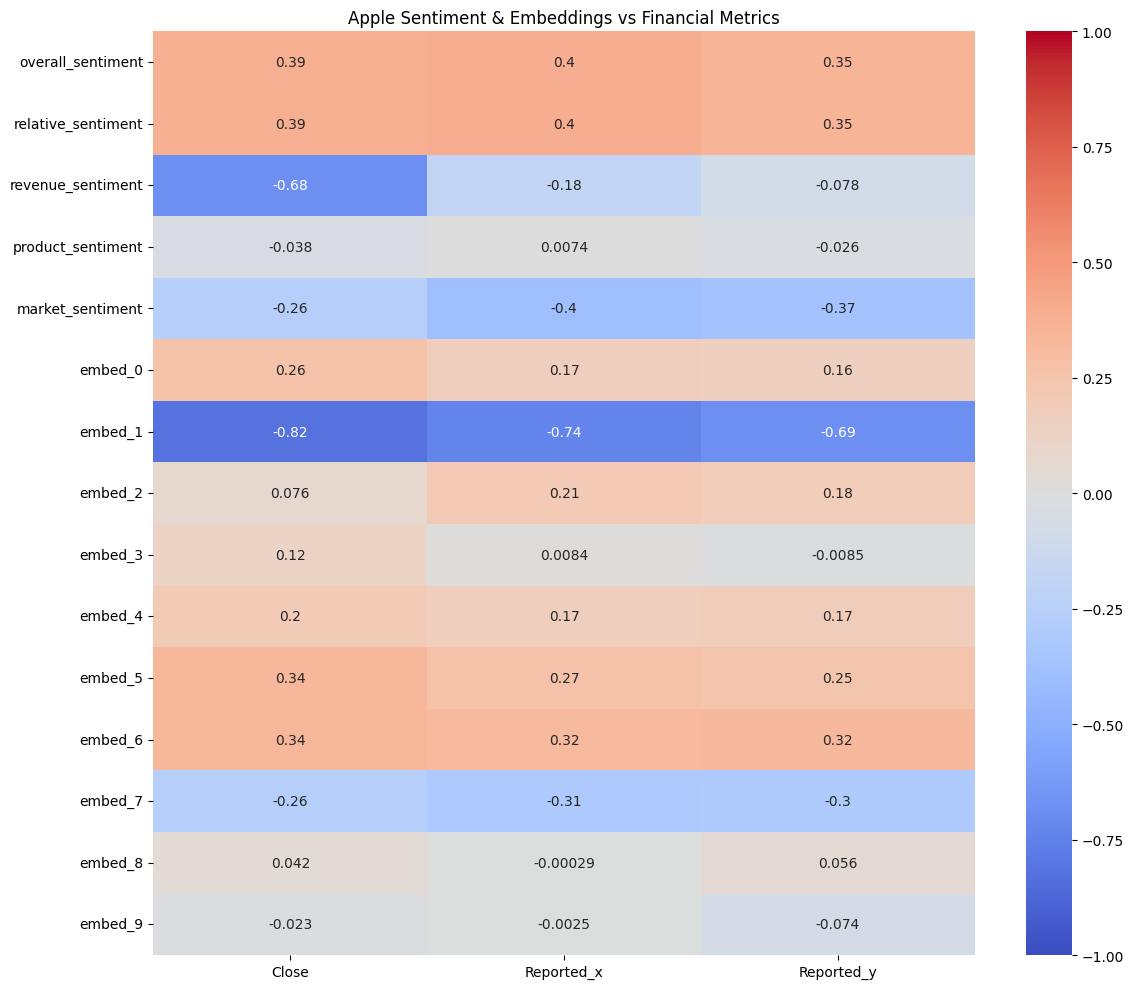

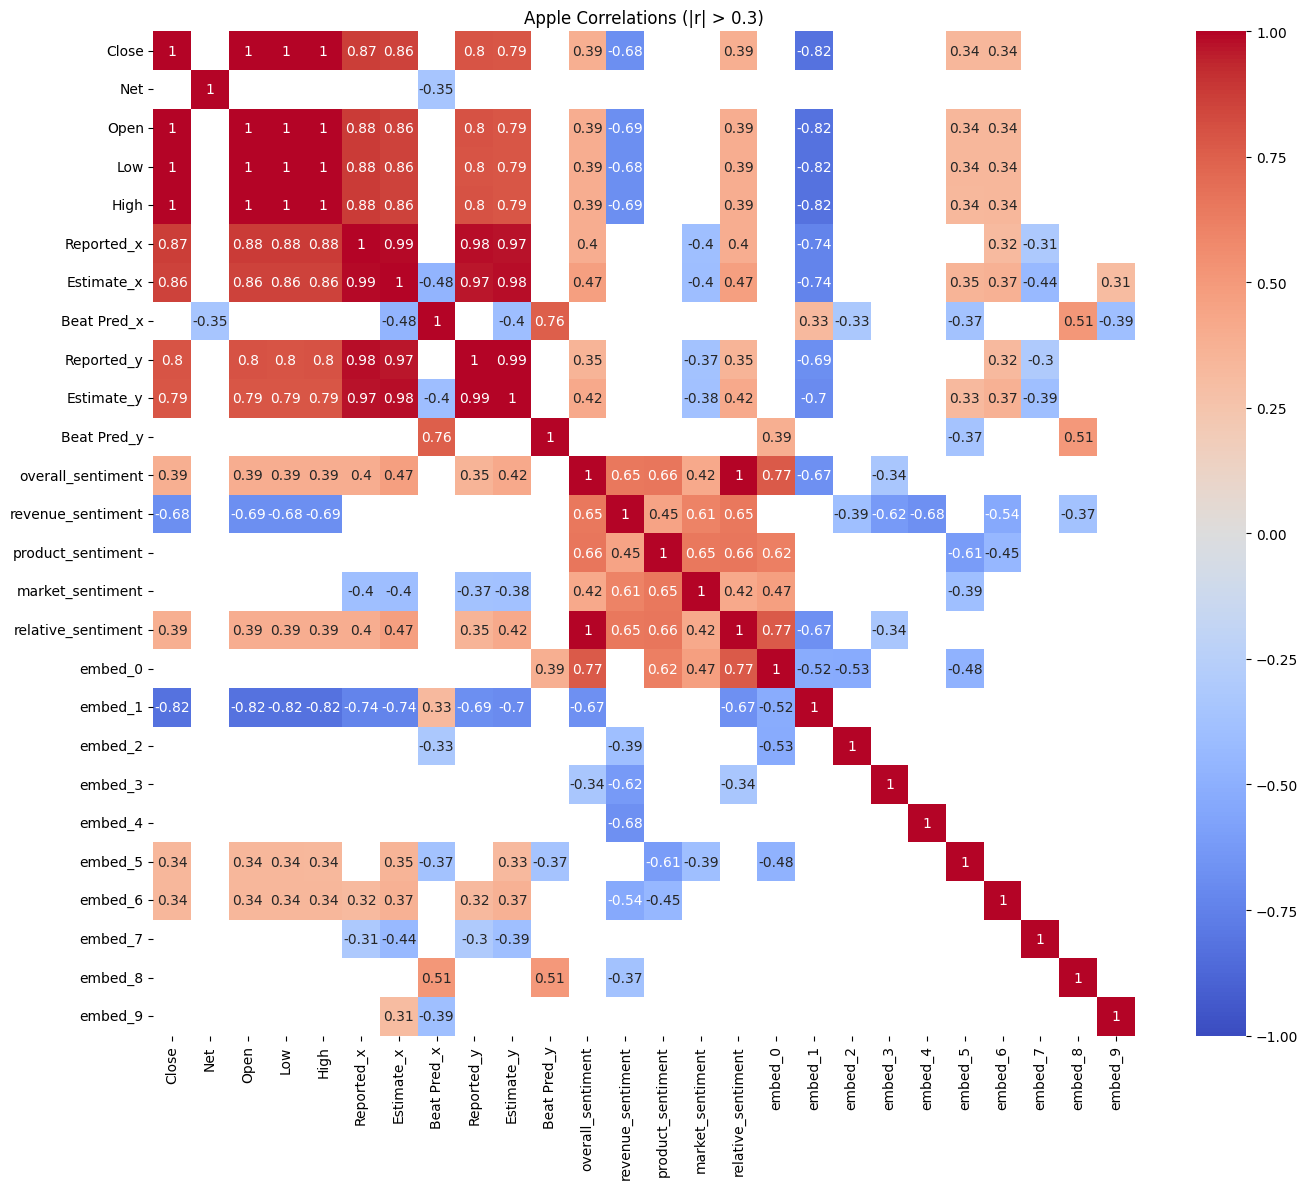

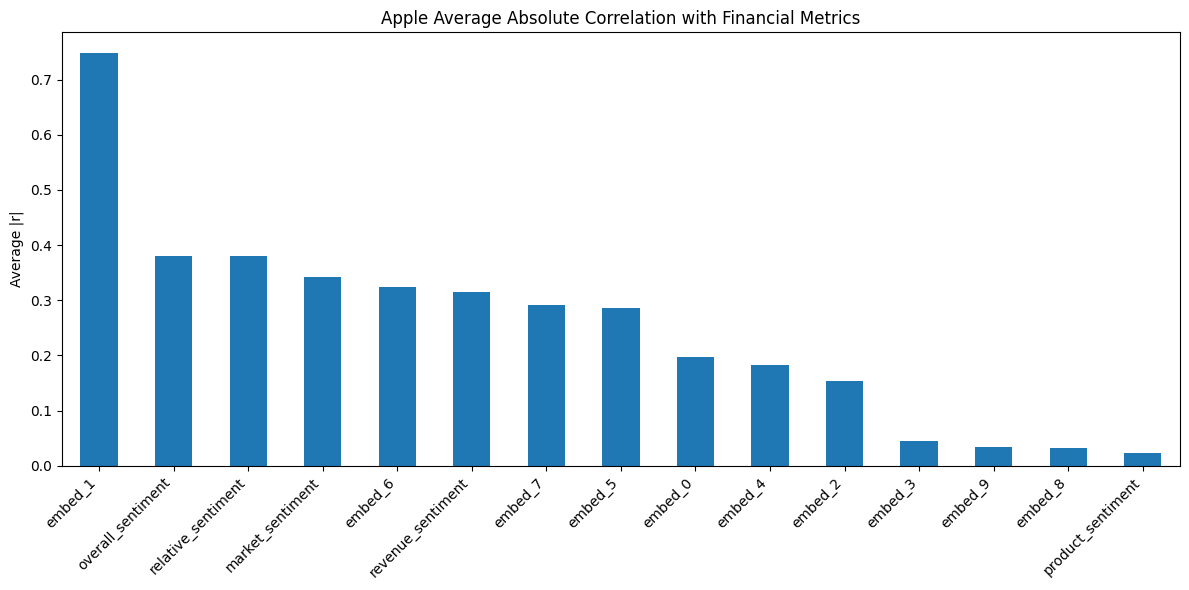


Stationarity Test Results (p-values):
Close: 0.9786189813457074
Net: 6.996288900017537e-23
Open: 0.9774263901111406
Low: 0.9800819914164629
High: 0.98014728101566
Reported_x: 0.9989812631062924
Estimate_x: 0.9753265161062825
Beat Pred_x: 0.9865540735747521
Reported_y: 0.7828370980569936
Estimate_y: 0.8873841710111298
Beat Pred_y: 0.04343977802125083
overall_sentiment: 0.014414103501205826
revenue_sentiment: 0.24243214887419023
product_sentiment: 0.0008431890468617592
market_sentiment: 0.0004124142998247903
relative_sentiment: 0.01441410350120576
embed_0: 0.008482716147416353
embed_1: 0.42264906295173355
embed_2: 0.0009352123477497455
embed_3: 0.005924330667670108
embed_4: 0.0032358573082805864
embed_5: 0.03474718686289623
embed_6: 0.004541317212694055
embed_7: 0.008152803009816304
embed_8: 0.023219172941958615
embed_9: 0.10269596157494965

Granger Causality Test Results (p-values for each lag):
Lag 1: 0.06935962243134518
Lag 2: 0.1884394472706661
Lag 3: 0.33107355245297193
Lag 4: 0.47

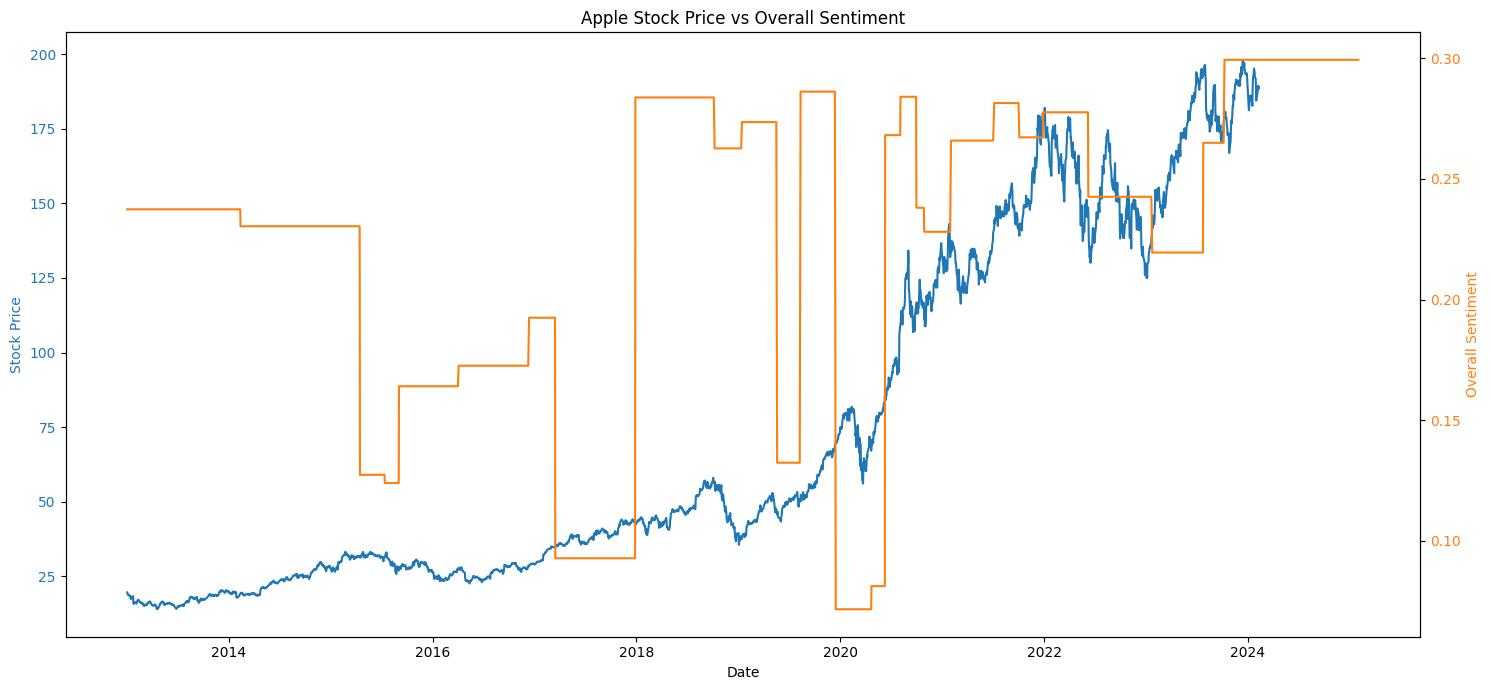


Lululemon Analysis:


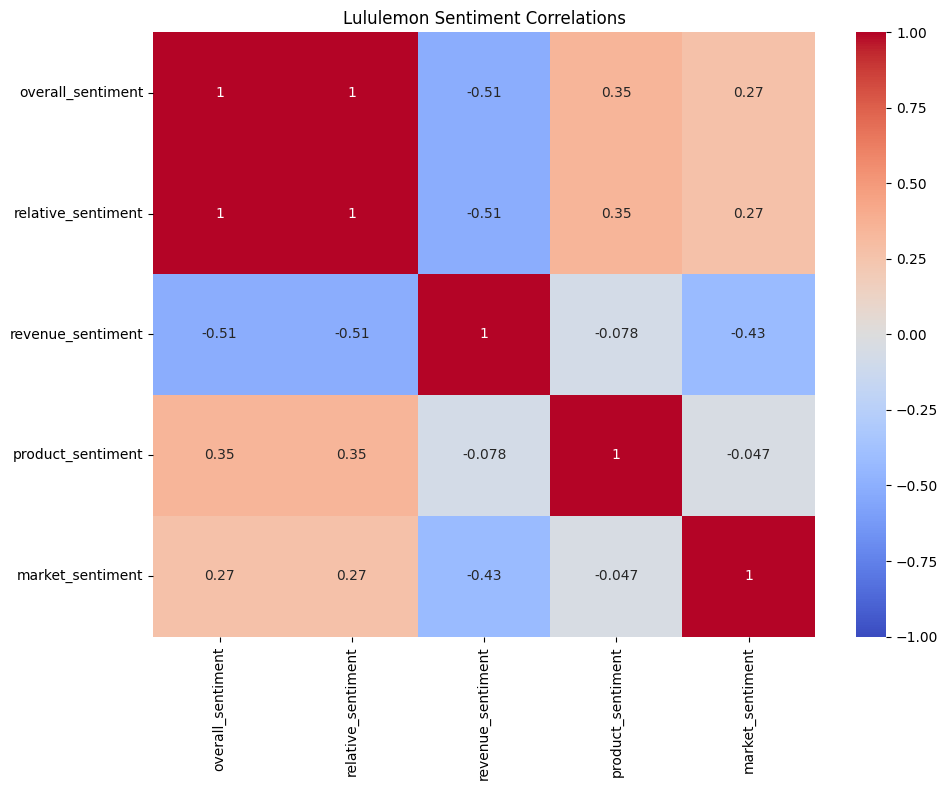

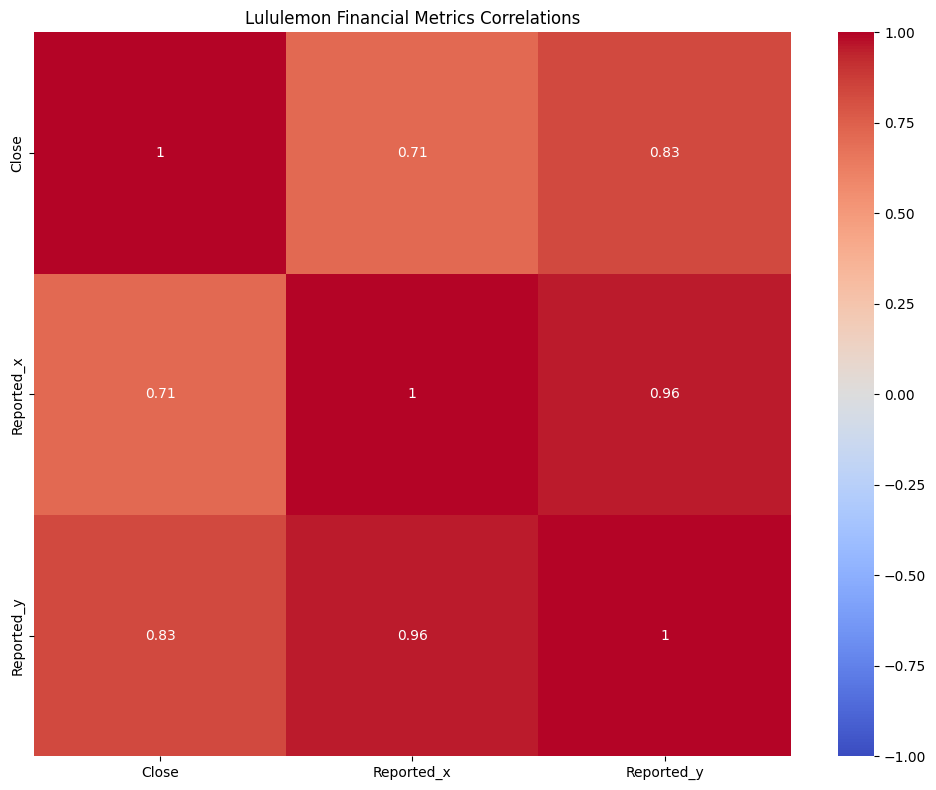

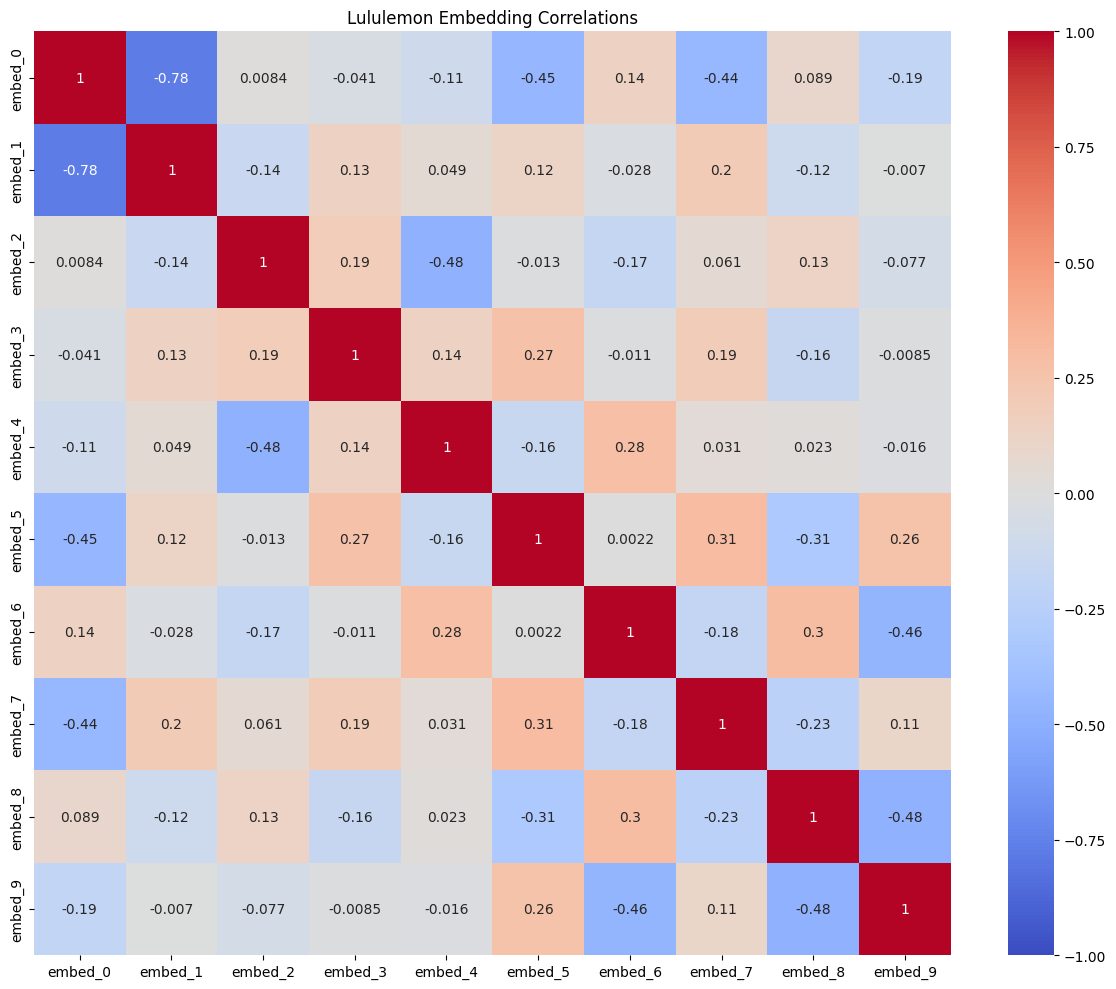

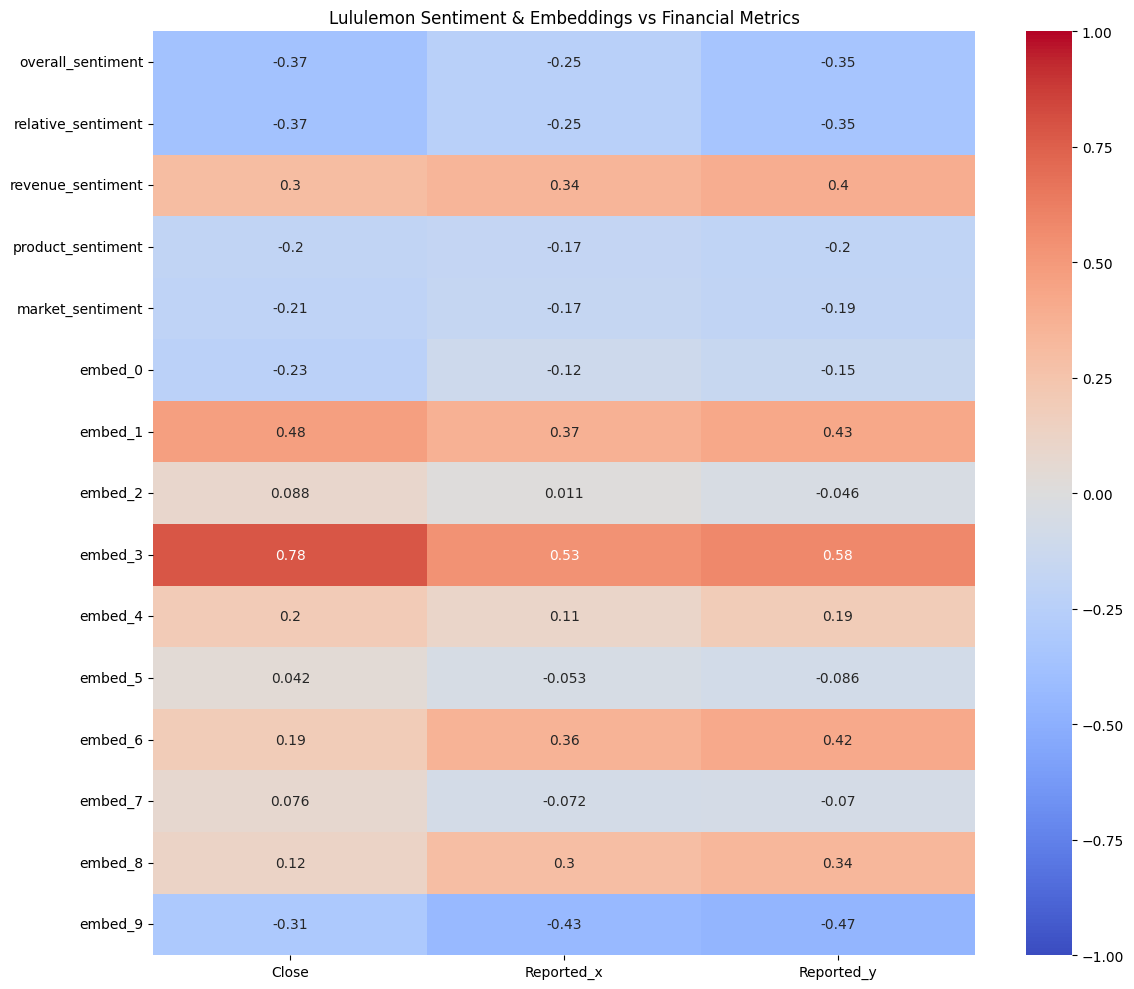

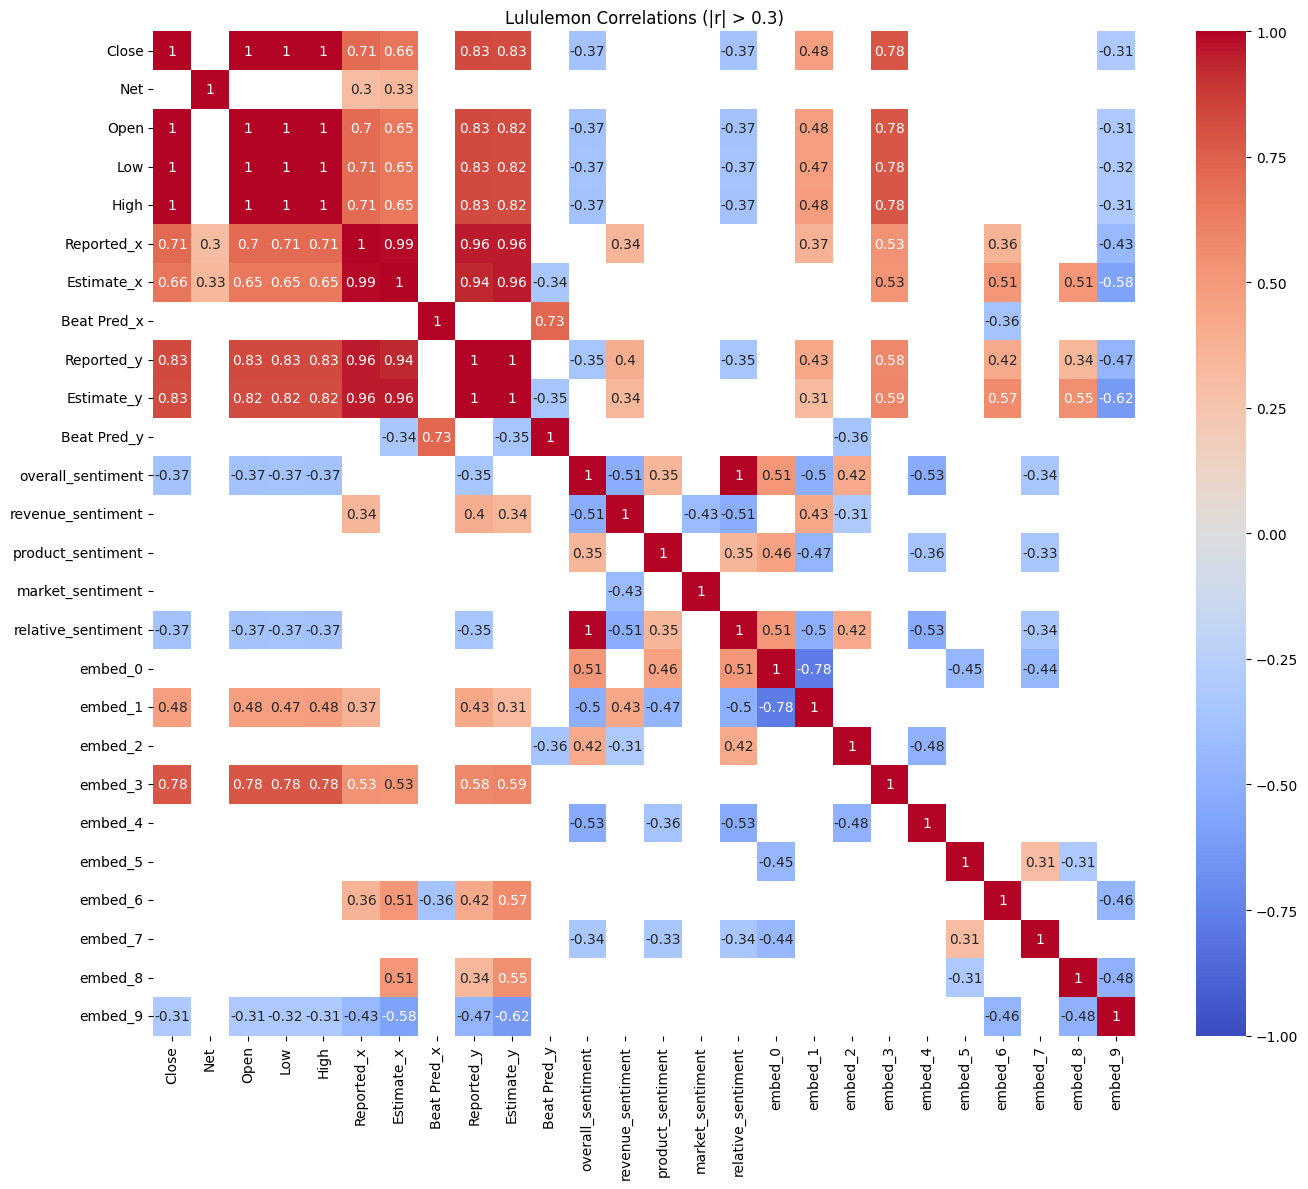

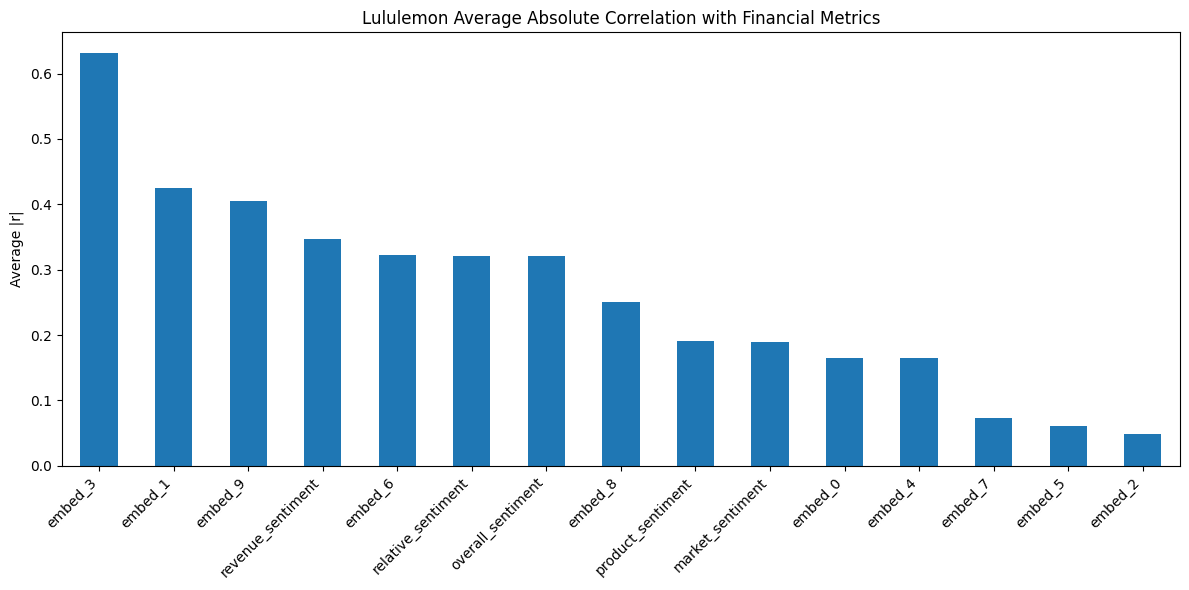


Stationarity Test Results (p-values):
Close: 0.9539865647820228
Net: 3.7102004397037433e-23
Open: 0.9442540417458952
Low: 0.9607124526964884
High: 0.9456175278096474
Reported_x: 1.0
Estimate_x: 0.9985755955575
Beat Pred_x: 0.15921374243748304
Reported_y: 1.0
Estimate_y: 0.9973043852269156
Beat Pred_y: 1.3669675921427389e-05
overall_sentiment: 0.01191492715494231
revenue_sentiment: 0.017965397671531786
product_sentiment: 0.003928439688391532
market_sentiment: 0.002042936396295338
relative_sentiment: 0.011914927154942617
embed_0: 0.004691453405494977
embed_1: 0.026665183015860867
embed_2: 0.0027388075280846908
embed_3: 0.43284286871493544
embed_4: 0.021728575973411466
embed_5: 0.005311862168173781
embed_6: 0.03119336465735544
embed_7: 0.0039047380246543736
embed_8: 0.05531891540457718
embed_9: 0.08196626612043872

Granger Causality Test Results (p-values for each lag):
Lag 1: 0.2314833743013594
Lag 2: 0.2006430325316049
Lag 3: 0.35660395019878194
Lag 4: 0.3428993545693092
Lag 5: 0.37333

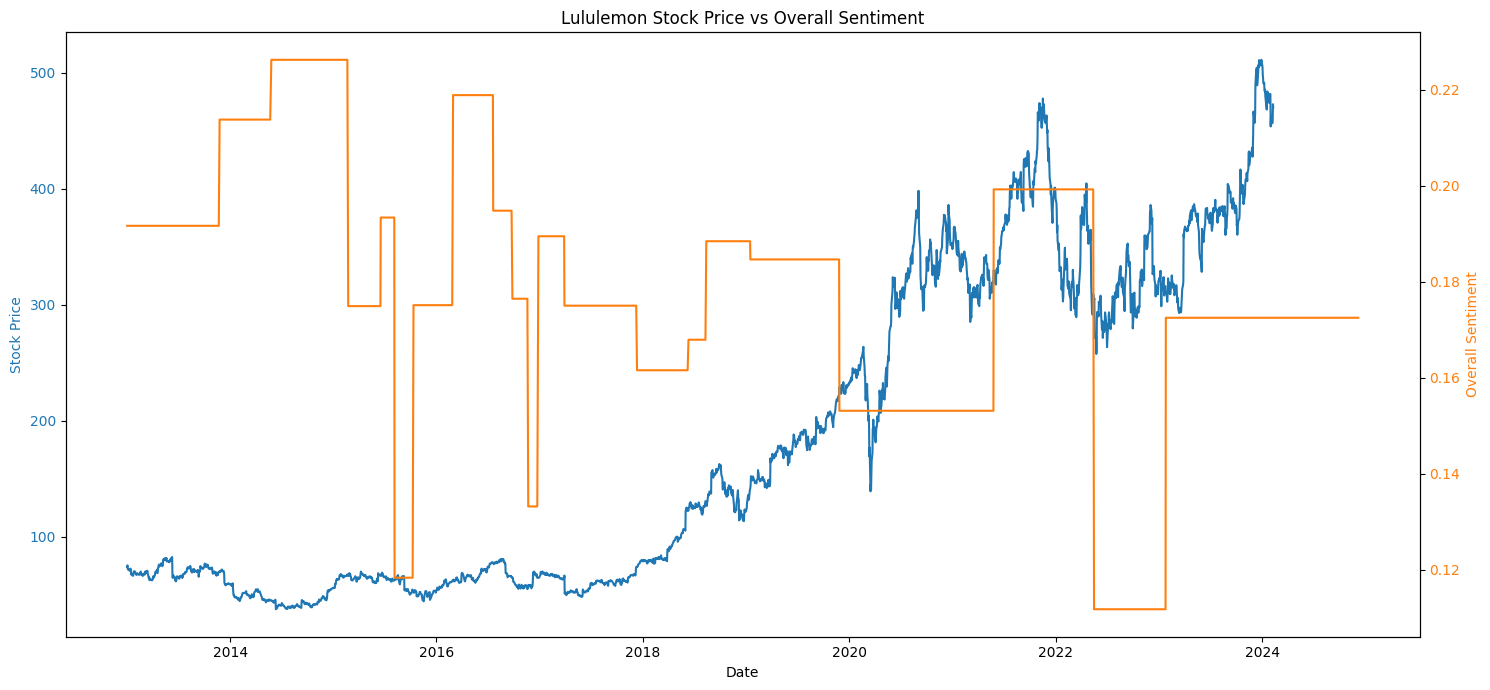

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

def vectorize_transcripts(transcripts, n_components=10):
    texts = list(transcripts.values())
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    svd = TruncatedSVD(n_components=n_components)
    embedded_matrix = svd.fit_transform(tfidf_matrix)
    embedded_df = pd.DataFrame(embedded_matrix, 
                               columns=[f'embed_{i}' for i in range(n_components)],
                               index=list(transcripts.keys()))
    return embedded_df

def preprocess_data(data):
    def convert_value(val):
        if isinstance(val, str):
            val = val.replace(',', '')
            if val.endswith('B'):
                return float(val[:-1]) * 1e9
            elif val.endswith('M'):
                return float(val[:-1]) * 1e6
            elif val.endswith('K'):
                return float(val[:-1]) * 1e3
        return val

    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].apply(convert_value)
    return data

def load_financial_data(stock_file, eps_file, rev_file):
    stock_data = pd.read_csv(stock_file)
    eps_data = pd.read_csv(eps_file)
    rev_data = pd.read_csv(rev_file)
    
    stock_data['Date'] = pd.to_datetime(stock_data['Exchange Date'])
    eps_data['Date'] = pd.to_datetime(eps_data['Date'])
    rev_data['Date'] = pd.to_datetime(rev_data['Date'])
    
    financial_data = pd.merge(stock_data, eps_data, on='Date', how='outer')
    financial_data = pd.merge(financial_data, rev_data, on='Date', how='outer')
    financial_data = financial_data.sort_values('Date')
    
    return preprocess_data(financial_data)

def align_data(sentiment_data, financial_data):
    return pd.merge_asof(financial_data.sort_values('Date'), 
                         sentiment_data.sort_values('date'), 
                         left_on='Date', 
                         right_on='date', 
                         direction='nearest')

def get_numeric_columns(data):
    return data.select_dtypes(include=[np.number]).columns.tolist()

def split_heatmaps(data, company):
    numeric_cols = get_numeric_columns(data)
    sentiment_cols = [col for col in ['overall_sentiment', 'relative_sentiment', 'revenue_sentiment', 'product_sentiment', 'market_sentiment'] if col in numeric_cols]
    financial_cols = [col for col in ['Close', 'Volume', 'Reported_x', 'Reported_y'] if col in numeric_cols]
    embed_cols = [col for col in numeric_cols if col.startswith('embed_')]

    # sentiment heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[sentiment_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'{company} Sentiment Correlations')
    plt.tight_layout()
    plt.show()

    # financial heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[financial_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'{company} Financial Metrics Correlations')
    plt.tight_layout()
    plt.show()

    # embeddings heatmap
    if embed_cols:
        plt.figure(figsize=(12, 10))
        sns.heatmap(data[embed_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
        plt.title(f'{company} Embedding Correlations')
        plt.tight_layout()
        plt.show()

def focused_heatmap(data, company):
    numeric_cols = get_numeric_columns(data)
    sentiment_cols = [col for col in ['overall_sentiment', 'relative_sentiment', 'revenue_sentiment', 'product_sentiment', 'market_sentiment'] if col in numeric_cols]
    financial_cols = [col for col in ['Close', 'Volume', 'Reported_x', 'Reported_y'] if col in numeric_cols]
    embed_cols = [col for col in numeric_cols if col.startswith('embed_')]

    corr_matrix = data[sentiment_cols + embed_cols + financial_cols].corr()
    focused_corr = corr_matrix.loc[sentiment_cols + embed_cols, financial_cols]

    plt.figure(figsize=(12, 10))
    sns.heatmap(focused_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'{company} Sentiment & Embeddings vs Financial Metrics')
    plt.tight_layout()
    plt.show()

def thresholded_heatmap(data, company, threshold=0.3):
    numeric_cols = get_numeric_columns(data)
    corr_matrix = data[numeric_cols].corr()
    mask = np.abs(corr_matrix) < threshold
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'{company} Correlations (|r| > {threshold})')
    plt.tight_layout()
    plt.show()

def summary_barplot(data, company):
    numeric_cols = get_numeric_columns(data)
    sentiment_cols = [col for col in ['overall_sentiment', 'relative_sentiment', 'revenue_sentiment', 'product_sentiment', 'market_sentiment'] if col in numeric_cols]
    financial_cols = [col for col in ['Close', 'Volume', 'Reported_x', 'Reported_y'] if col in numeric_cols]
    embed_cols = [col for col in numeric_cols if col.startswith('embed_')]

    corr_matrix = data[sentiment_cols + embed_cols + financial_cols].corr()
    avg_corr = corr_matrix.loc[sentiment_cols + embed_cols, financial_cols].abs().mean(axis=1)

    plt.figure(figsize=(12, 6))
    avg_corr.sort_values(ascending=False).plot(kind='bar')
    plt.title(f'{company} Average Absolute Correlation with Financial Metrics')
    plt.ylabel('Average |r|')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def visualize_correlations(data, company):
    split_heatmaps(data, company)
    focused_heatmap(data, company)
    thresholded_heatmap(data, company)
    summary_barplot(data, company)

def test_stationarity(data):
    return {column: adfuller(data[column].dropna())[1] for column in data.columns 
            if data[column].dtype in ['float64', 'int64']}

def perform_granger_causality(data, x, y, max_lags=5):
    data = data[[x, y]].dropna()
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        results = grangercausalitytests(data, maxlag=max_lags, verbose=False)
    
    p_values = {lag: result[0]['ssr_ftest'][1] for lag, result in results.items()}
    return p_values

def plot_sentiment_vs_price(data, company):
    fig, ax1 = plt.subplots(figsize=(15,7))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(data['Date'], data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Overall Sentiment', color='tab:orange')
    ax2.plot(data['Date'], data['overall_sentiment'], color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title(f'{company} Stock Price vs Overall Sentiment')
    fig.tight_layout()
    plt.show()

def main():
    base_path = '/Users/sebastian_a/Downloads/sentimental_analysis_files'
    transcript_directory = f'{base_path}/transcripts/txt'

    # load transcripts
    apple_transcripts = load_transcripts(transcript_directory, 'Apple Inc')
    lululemon_transcripts = load_transcripts(transcript_directory, 'Lululemon Athletica Inc')

    # vectorize transcripts
    apple_vectors = vectorize_transcripts(apple_transcripts)
    lululemon_vectors = vectorize_transcripts(lululemon_transcripts)

    # analyze sentiments
    apple_sentiment = analyze_transcripts(apple_transcripts)
    lululemon_sentiment = analyze_transcripts(lululemon_transcripts)

    # combine sentiment and vector data
    apple_combined = pd.merge(apple_sentiment, apple_vectors, left_on='date', right_index=True)
    lululemon_combined = pd.merge(lululemon_sentiment, lululemon_vectors, left_on='date', right_index=True)

    # load and align financial data
    apple_financial = load_financial_data(
        f'{base_path}/stocks/AAPL_2024-02-10.csv',
        f'{base_path}/earnings/AAPL_EPS.csv',
        f'{base_path}/earnings/AAPL_REV.csv'
    )
    lululemon_financial = load_financial_data(
        f'{base_path}/stocks/LULU_2024-02-10.csv',
        f'{base_path}/earnings/LULU_EPS.csv',
        f'{base_path}/earnings/LULU_REV.csv'
    )
    apple_aligned = align_data(apple_combined, apple_financial)
    lululemon_aligned = align_data(lululemon_combined, lululemon_financial)

    # perform analyses
    for company, data in [('Apple', apple_aligned), ('Lululemon', lululemon_aligned)]:
        print(f"\n{company} Analysis:")
        
        # visualize correlations
        visualize_correlations(data, company)
        
        # stationarity and Granger causality tests
        stationarity = test_stationarity(data)
        granger_results = perform_granger_causality(data, 'overall_sentiment', 'Close')
        
        print("\nStationarity Test Results (p-values):")
        for column, p_value in stationarity.items():
            print(f"{column}: {p_value}")
        
        print("\nGranger Causality Test Results (p-values for each lag):")
        for lag, p_value in granger_results.items():
            print(f"Lag {lag}: {p_value}")
        
        plot_sentiment_vs_price(data, company)

if __name__ == "__main__":
    main()